In [4]:
import pandas as pd                                             
import numpy as np     
import seaborn as sns                                         
from matplotlib import pyplot as plt                            
from sklearn.model_selection import train_test_split,RandomizedSearchCV                        
from sklearn.tree import DecisionTreeRegressor                  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression               
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score


# Split The Data



In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/CovidDietData.csv')
data.pop(data.columns[0]) #drop the index column
x = data.drop(columns = 'deaths')
y = data['deaths']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0 )


# Linear Regression



The learning score on train set 0.5821539665736893
The learning score on test set 0.5755847018244504
0.5755847018244504


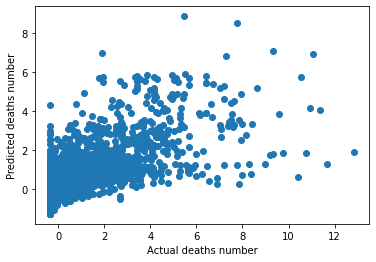

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_test = lr.predict(x_test)
print("The learning score on train set", lr.score(x_train,y_train))
print("The learning score on test set", lr.score(x_test,y_test))
print(r2_score(y_test, y_pred_test)) # Coefficient of determination : measures the prediction quality of a linear regression) | close to 1 means its a good model, close to 0 means its a bad model
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()


# Decision Tree




The learning score on train set 0.36860333632275777
The learning score on test set 0.371269031312338
r2 score =  0.5755847018244504


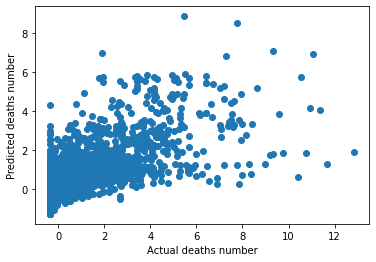

In [ ]:
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=0)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
print("The learning score on train set", dt.score(x_train,y_train))
print("The learning score on test set", dt.score(x_test,y_test))
print("r2 score = ",r2_score(y_test, y_pred_test))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()


# Random Forests



The learning score on train set 0.9622108914975944
The learning score on test set 0.7224432351273972
r2 score =  0.7224432351273972


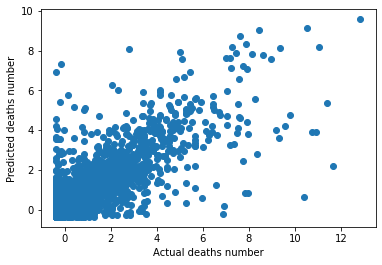

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print("The learning score on train set", rf.score(x_train,y_train))
print("The learning score on test set", rf.score(x_test,y_test))
print("r2 score = ",r2_score(y_test, y_predict))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()

We might have an overfiting, because : The learning score on test set is much smaller than The learning score on train set

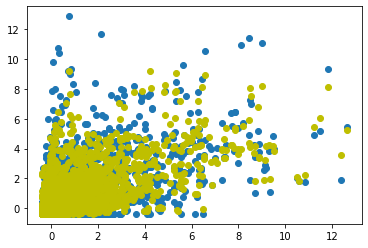

In [ ]:
plt.scatter(x_test.iloc[:,0],y_test)
plt.scatter(x_test.iloc[:,0],y_predict, c="y")

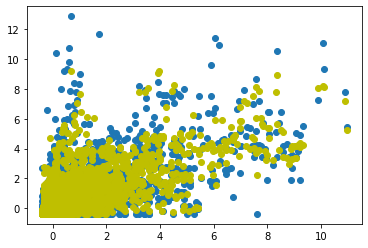

In [ ]:
plt.scatter(x_test.iloc[:,1],y_test)
plt.scatter(x_test.iloc[:,1],y_predict, c="y")

# Artificial Neural Networks



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The learning score on train set 0.7668445933191754
The learning score on test set 0.7253428371547671
0.7253428371547671


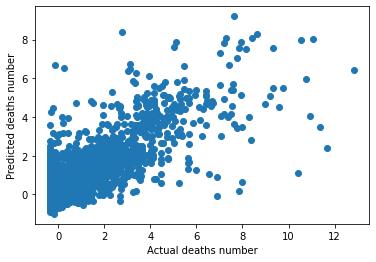

In [8]:
nn = MLPRegressor(hidden_layer_sizes=(100,100,100,), activation='tanh',max_iter=200, solver='lbfgs');
history = nn.fit(x_train, y_train)
predictions =  nn.predict(x_test)
print("The learning score on train set", nn.score(x_train,y_train))
print("The learning score on test set", nn.score(x_test,y_test))
print(r2_score(y_test,predictions)) 
plt.scatter(y_test, predictions)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()



# HyperParameters Optimization (Tuning)



ANN Gave the best r2_score, now it's time to optmize the model parameters using the RandomizedSearchCV method (instead GridSearchCV which takes along execution time).

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7371056183035269


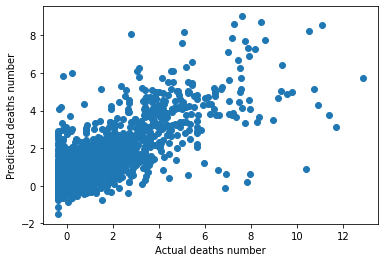

In [11]:
parameters = {
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
nn = MLPRegressor();
NN_random = RandomizedSearchCV(estimator=nn, param_distributions=parameters, cv=3, verbose=2, n_jobs=-1, scoring='neg_mean_absolute_error')
history = NN_random.fit(x_train, y_train)
predictions =  NN_random.predict(x_test)
print(r2_score(y_test,predictions)) 
plt.scatter(y_test, predictions)
plt.xlabel('Actual deaths number')
plt.ylabel('Predicted deaths number')
plt.show()

In [12]:
NN_random.best_params_

{'solver': 'lbfgs', 'learning_rate': 'adaptive', 'activation': 'relu'}